# Data Analysis for Flow channel

### Required python libraries

In [65]:
import os
import numpy as np
import mne
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.signal import butter, freqs, filtfilt, find_peaks
from os import listdir
from os.path import isfile, join
import pandas as pd
import statistics

### Importing .edf File

In [66]:
file = "../NewData/BINDUV~ PSG_9e1a1e68-ac02-4a80-89a4-cdea20ea282a.edf"
data = mne.io.read_raw_edf(file)

Extracting EDF parameters from D:\Dataset\NewData\BINDUV~ PSG_9e1a1e68-ac02-4a80-89a4-cdea20ea282a.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


### Extracting data from the file

In [67]:
raw_data = data.get_data()
info = data.info

# Un-comment the below code to view the data fields

print(info)

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Event, C3, O1, A1, Fp1, LOC, CHIN1, ECGL, X2, ...
    chs : list | 35 items (EEG: 35)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 100.0 Hz
    meas_date : tuple | 2019-04-10 22:07:03 GMT
    nchan : int | 35
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 200.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : No

In [68]:
# Un-comment the below code to view the data channels

# print(data.ch_names)
data_channel = data.ch_names

j = 0
for i in data_channel:
    print(i , "     " , j)
    j += 1

Event       0
C3       1
O1       2
A1       3
Fp1       4
LOC       5
CHIN1       6
ECGL       7
X2       8
RAT1       9
X4       10
Fz       11
X5       12
X7       13
C4       14
O2       15
A2       16
Fp2       17
ROC       18
CHIN2       19
ECGR       20
C44       21
RAT2       22
X6       23
X8       24
CHEST       25
ABD       26
FLOW       27
SNORE       28
POS       29
DC2       30
DC3       31
DC4       32
OSAT       33
PR       34


In [69]:
print("Selected Required Channel: ", data.ch_names[25])

Selected Required Channel:  CHEST


In [118]:
flow = raw_data[25]    # Print the data from Flow channel
print(flow)
flow = flow[200000:1100000]
# Better list containing data
# Un-comment the below code for viewing the flow channel data

# for i in flow:
#     print(i)

[-4.65224689e-06 -6.24730297e-06 -7.84235904e-06 ...  1.32921340e-07
  1.32921340e-07  1.32921340e-07]


### Filtering flow signal

c:\users\arjun\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


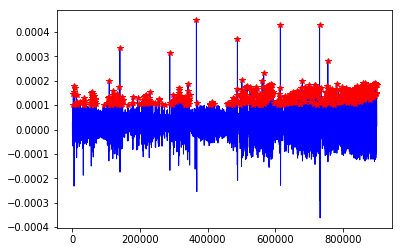

Beats per minute:  9
Number of spikes per minute:  553


In [119]:
#  Butter Worth Filter
fs = 256
fc = 0.5
b, a = butter(6, fc/(fs/2), 'low', analog=False)

# Filtering the signal
y = filtfilt(b, a, flow)

peaks, _ = find_peaks(y, distance = 150, height=0.0001)
# peaks, _ = find_peaks(y, distance = 150, height=)
peaks_num = (len(peaks))                             # Contains the total no. of peaks
plt.plot(y, 'b-', linewidth = 1)
plt.plot(peaks, y[peaks], "*", color="red")          # Plotting the peak points
# fig1 = plt.gfc()
plt.show()                                           # Plotting the flow channel data


n = len(flow)
new_var = len(peaks)


# print(n)
duration_sec = n / fs
duration_min = duration_sec / 60


avg = new_var / duration_min

print("Beats per minute: ", round(avg))
print("Number of spikes per minute: ", round(peaks_num, 2))


### Calculations

Peak interval Average:  1.4609201838643996e-07


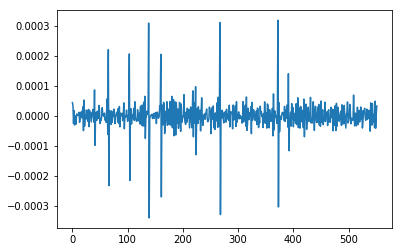

In [120]:
inter_peak_interval = []
inter_peak_interval_index = []

for i in range(0, len(y[peaks]) - 1):
    inter_peak_interval.append(y[peaks][i + 1] - y[peaks][i])
    inter_peak_interval_index.append(i)
    
ipi_mean = np.array(inter_peak_interval).mean()
print('Peak interval Average: ', ipi_mean)


plt.plot(inter_peak_interval_index, inter_peak_interval)

### Peak Interval Time

In [48]:
inter_peak_time = []

for i in range(0, len(y[peaks]) - 1):
    inter_peak_time.append(((peaks[i+1] - peaks[i]))/fs)
    
    
ipt_mean = np.array(inter_peak_time).mean()
ipt_max = np.array(inter_peak_time).max()
ipt_min = np.array(inter_peak_time).min()
# print(inter_peak_time)

# print(peaks)
print('Peak Interval Time average: ', round(ipt_mean, 2))
print('Peak Interval Time Max: ', round(ipt_max, 2))
print('Peak Interval Time Min: ', round(ipt_min, 2))


Peak Interval Time average:  3.79
Peak Interval Time Max:  6.6
Peak Interval Time Min:  0.59


### Average Peak Time

In [49]:
# peak_time = []
# for i in range(0, len(peaks)):
#     peak_time.append((peaks[i] / 256))

# avg_peak = round(np.array(peak_time).mean())
# print("Average Peak Time: ", avg_peak)

In [50]:
# index = []
# for i in range(len(peaks)):
#     if peaks[i]>= 1000000 and peaks[i]<=2000000:
#         index.append(i)
# # print(index)

# peak_copy = y[peaks].copy()

# begin = index[0]
# end = index[-1]

# print('Max',y[peaks][begin:end+1].max())
# print('Min',y[peaks][begin:end+1].min())

# max = y[peaks][begin:end+1].max()
# min = y[peaks][begin:end+1].min()
# outliers = []
# outliers_index = []
# for i in range(len(y[peaks])):
# #     print(i)
#     if y[peaks][i] > max :
#         outliers.append(y[peaks])
#         outliers_index.append(i)
#         peak_copy[i] = max
        
        
# print(len(outliers))
# # print(outliers)
# print(len(peaks))
# print(peak_copy.max())

# y[peaks] = peak_copy
# print(y[peaks].max())
# plt.plot(y, 'b-', linewidth=1)

# plt.plot(peaks, peak_copy, "*", color="red")

### Average Peak Value

In [51]:
peak_mean= np.array(y[peaks]).mean()
print(np.array(y[peaks]).mean())

0.0004713503633483819


In [ ]:
# np.savetxt('data.csv', (peaks_num, flow_mean))


df = pd.DataFrame([])
data = [[file,len(flow),dur,round(peaks_num),bpm_avg,ipi_mean,avg_peak]]

df1 = pd.DataFrame(data,columns=['File Name','Signal Length','Duration','Beat Count','BPM','Peak Interval Avg','Peak Time Avg'])
df = df.append(df1,  ignore_index = True)
print(df)
df.to_csv("Stats_temp.csv", encoding='utf-8', index=False)

---
---
---
---

# MultiFile Script

In [ ]:
import mne
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
# import heartpy as hp
from scipy.signal import butter, freqs, filtfilt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

onlyfiles = [f for f in listdir("./dataset") if isfile(join("./dataset", f))]
df = pd.DataFrame([])
def find_time(sig):
    time = ((sig/256)/60)/60
    print("Time: ", time , "\nLength: ",sig)
    return ((sig/256)/60)/60


def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        
        j+=1
        
current = 1
total = len(onlyfiles)
for file in onlyfiles:
    filename = file
    file = join("./dataset", file)
    print("Processing..", file, current,"/",total)
    data = mne.io.read_raw_edf(file)
    raw_data = data.get_data()
    # you can get the metadata included in the file and a list of all channels:
    info = data.info
    channels = data.ch_names
    sig = raw_data[channel_id(channels,'FLOW')]
    
    #   print("Signal Loaded..")
    fs = 256
    n = len(sig)
    # n = 1000
    fc = 4
    duration_sec = n / fs
    duration_min = duration_sec / 60

    b, a = butter(6, fc/(fs/2), 'low', analog=False)
    # w, h = freqs(b, a)

    y = filtfilt(b, a, sig[:])

    peaks, _ = find_peaks(y, distance = 150, height=0)
    plt.plot(y, 'b-', linewidth=1)
    plt.plot(peaks, y[peaks], "*", color="red")
    fig1 = plt.gcf()
    plt.show()

        
    #     fig1.savefig(file.split(".")[0]+".png", dpi= 100)
    beat_count = len(peaks)
    fs = 256
    n = len(sig)
    duration_sec = n/fs
    duration_min = duration_sec/60
    bpm_avg = beat_count/duration_min
    print(bpm_avg)
    
    inter_peak_interval = []
    inter_peak_interval_index = []

    for i in range(0, len(y[peaks]) - 1):
        inter_peak_interval.append(y[peaks][i + 1] - y[peaks][i])
        inter_peak_interval_index.append(i)

    ipi_mean = np.array(inter_peak_interval).mean()
    print('Peak interval Average: ', ipi_mean)

    plt.plot(inter_peak_interval_index, inter_peak_interval)
    
    inter_peak_time = []

    for i in range(0, len(y[peaks]) - 1):
        inter_peak_time.append(((peaks[i+1] - peaks[i]))/60)


    ipt_mean = np.array(inter_peak_time).mean()
    ipt_max = np.array(inter_peak_time).max()
    ipt_min = np.array(inter_peak_time).min()
    # print(inter_peak_time)

    # print(peaks)
    print('Peak Interval Time average: ',ipt_mean)
    print('Peak Interval Time Max: ',ipt_max)
    print('Peak Interval Time Min: ',ipt_min)
    
    data = [[file,find_time(len(sig)),bpm_avg,ipi_mean,ipt_max,ipt_min,avg_peak, np.array(y[peaks]).mean()]]
    current+=1
    df1 = pd.DataFrame(data,columns=['File Name','Duration','BPM','Peak Interval Avg','Peak Time Interval Max','Peak Time Interval Min','Peak Time Avg','Peak Avg'])
    df = df.append(df1,  ignore_index = True)
    print(df)


df.to_csv("Flow.csv", encoding='utf-8', index=False)